# [DHS Program API](https://api.dhsprogram.com/#/introapi.cfm)




**Surveys**<br />
*Provides a list of surveys that have survey data available through the DHS Program. The DHS Program contains hundreds of surveys including Demographic and Health Surveys (DHS), Malaria Indicator Surveys (MIS), Service Provision Assessments (SPA), AIDS Indicator Surveys (AIS), and others.*
- [List of Surveys](https://api.dhsprogram.com/rest/dhs/surveys?returnFields=SurveyId,SurveyYearLabel,SurveyType,CountryName&f=html)
- *Demographic and Health Surveys (DHS)*
- MZ1997DHS Mozambique DHS 1997
- MZ2003DHS Mozambique DHS 2003
- MZ2009AIS Mozambique AIS 2009
- **MZ2011DHS Mozambique DHS 2011**
- MZ2015AIS Mozambique AIS 2015
- MZ2018MIS Mozambique MIS 2018

**Indicator Data**<br />
*Provides specific survey indicator data on a national, subnational or disaggregated level.*

**Indicators**<br />
*Percentage of households whose main source of drinking water is*
- **WS_SRCE_H_IMP	Households using an improved water source**
- WS_SRCE_H_BOT	Households using bottled water
- WS_SRCE_H_TOT	Households: Total
- [List of Indicators](https://api.dhsprogram.com/rest/dhs/indicators?returnFields=IndicatorId,Label,Definition&f=html)

**Countries**<br />
- [List of Countries](https://api.dhsprogram.com/rest/dhs/countries?returnFields=CountryName,DHS_CountryCode&f=html)
- **Mozambique = MZ**

**Geometry**<br />
*Provides a list of coordinates that have geometry data available through The DHS Program.*
- [Geometry Examples](https://api.dhsprogram.com/rest/dhs/geometry/examples)

**Tags**<br />
- [List of Tags](https://api.dhsprogram.com/rest/dhs/tags?&f=html)

---

[GeoJSON.io Test](http://geojson.io/#map=2/20.0/0.0)<br />
[RFC7946 - The GeoJSON Format](https://datatracker.ietf.org/doc/html/rfc7946)<br />

In [ ]:
import json
from urllib.request import urlopen
import pprint

In [ ]:
def dhs_abfrage(query: str):
    #Import libraries.
    
    api_key = ',THKOLN-051622'
    #Query the API for a list of countries.
    
    # DATA-API Url
    #url = 'https://api.dhsprogram.com/rest/dhs/data/'
    # Geometry-v8-API Url
    url = 'https://api.dhsprogram.com/rest/dhs/v8/geometry/'
    
    #form = '?f=geojson&returnGeometry=true'
    form = ''
    api_url = f'{url}{query}{api_key}{form}'
    
    
    # TESTDATEN !!!
    
    ## MZ = Mozambique
    ## WS_SRCE_H_IMP = Households using an improved water source
    
    # Api-General-Test
    #api_url = r'https://api.dhsprogram.com/rest/dhs/data?countryIds=MZ&f=json'
    
    # TH-Api-Key Test
    #api_url = 'https://api.dhsprogram.com/rest/dhs/data/MZ,WS_SRCE_H_IMP,THKOLN-051622'
    
    # Test Data + Geodaten (geojson)
    api_url = 'https://api.dhsprogram.com/rest/dhs/data/KE2014DHS,WS_SRCE_H_TOT?f=geojson&returnGeometry=true'
    # keine geodaten für MZ & WS_SRCE_H_IMP
    
    # Test Geo-API
    #api_url = 'https://api.dhsprogram.com/rest/dhs/v8/geometry/MZ,WS_SRCE_H_IMP'
    
    
    # -----------------------------
    #api_url = 'https://api.dhsprogram.com/rest/dhs/surveys?indicatorIds=FP_CUSM_W_ANY&countryIds=MZ&surveyIds=MZ1997DHS,MZ2003DHS,MZ2009AIS,MZ2011DHS,MZ2015AIS,MZ2018MIS,THKOLN-051622&lang=en&returnGeometry=true&f=geojson'
    
    # ?perpage=50
    # Einschränken der Datenwiedergabe auf Sides
    
    # Format-Typen
    # HTML
    # JSON
    # PJSON
    # geoJSON
    # JSONP
    # XML
    # CSV
    
    # Obtain and Parse the list into a Python Object.
    req = urlopen(api_url)
    resp = json.loads(req.read())
    
    return resp

In [ ]:
# Test query = Households using an improved water source
abfrage = 'MZ,WS_SRCE_H_IMP'

test_data = dhs_abfrage(abfrage)

In [ ]:
pprint.pprint(test_data)
with open("geojsonreturn.geojson", "w") as text_file:
    text_file.write(str(test_data))

In [ ]:
for i in test_data['features']:
    pprint.pprint(i)

In [ ]:
RecordCount = test_data['RecordCount']
print(f'Anzahl der Datensätze {RecordCount}')

In [ ]:
"""TotalPages
Data
RecordsReturned
Page
RecordCount"""

t_geo_data = test_data['Data'][0]
t_geo_data

In [ ]:
with open("test_map.geojson", "w") as text_file:
    text_file.write(str(t_geo_data))

In [ ]:
import shapely.geometry
import geopandas
shapely_polygon = shapely.geometry.Polygon([(0, 0), (0, 1), (1, 0)])


geopandas.GeoSeries([shapely_polygon]).__geo_interface__




{'bbox': (0.0, 0.0, 1.0, 1.0),
 'features': [{'bbox': (0.0, 0.0, 1.0, 1.0),
   'geometry': {'coordinates': (((0.0, 0.0),
      (0.0, 1.0),
      (1.0, 0.0),
      (0.0, 0.0)),),
    'type': 'Polygon'},
   'id': '0',
   'properties': {},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

---

## DHS Data Api
#### Mozambique
##### Percentage of households whose main source of drinking water is an improved source

https://api.dhsprogram.com/rest/dhs/data/MZ,WS_SRCE_H_IMP,THKOLN-051622

```{'DataId': 281028,
 'SurveyId': 'MZ1997DHS',
 'Indicator': 'Households using an improved water source',
 'IsPreferred': 1,
 'Value': 20.7,
 'SDRID': 'WSSRCEHIMP',
 'Precision': 1,
 'RegionId': '',
 'SurveyYearLabel': '1997',
 'SurveyType': 'DHS',
 'SurveyYear': 1997,
 'IndicatorOrder': 230161010,
 'DHS_CountryCode': 'MZ',
 'CILow': '',
 'CountryName': 'Mozambique',
 'IndicatorType': 'I',
 'CharacteristicId': 1000,
 'CharacteristicCategory': 'Total',
 'IndicatorId': 'WS_SRCE_H_IMP',
 'CharacteristicOrder': 0,
 'CharacteristicLabel': 'Total',
 'ByVariableLabel': '',
 'DenominatorUnweighted': 9282.0,
 'DenominatorWeighted': 9282.0,
 'CIHigh': '',
 'IsTotal': 1,
 'ByVariableId': 0,
 'LevelRank': ''}```
 
---

## Geometry Api
#### Mozambique
##### Percentage of households whose main source of drinking water is an improved source

https://api.dhsprogram.com/rest/dhs/v8/geometry/MZ,WS_SRCE_H_IMP

```{'CountryCode': 'MZ',
 'SurveyId': 'MZ1997DHS',
 'SurveyType': 'DHS',
 'SurveyYear': 1997,
 'CountryName': 'Mozambique',
 'LevelRank': 1,
 'Coordinates': 'POLYGON ((32.99447 -25.96944, 32.99367 -25.97589, 32.99039 -25.98086, 32.99039 -25.98172, 32.98867 -25.98253, 32.987 -25.98586, 32.98531 -25.98672, 32.98531 -25.98917, 32.982 -25.99422, 32.97953 -25.99842, 32.97992 -25.99961, 32.98192 -26, 32.98103 -26.00242, 32.97775 -26.00667, 32.97775 -26.00825, 32.97436 -26.01244, 32.97361 -26.01664, 32.97278 -26.01744, 32.97278 -26.02908, 32.97189 -26.02995, 32.97189 -26.03578, 32.97106 -26.03664, 32.97106 -26.03911, 32.96942 -26.04164, 32.96942 -26.04417, 32.96858 -26.04494, 32.96858 -26.04747, 32.96695 -26.04994, 32.96695 -26.05414, 32.96611 -26.055, 32.96522 -26.05658, 32.96611 -26.06497, 32.96439 -26.06578, 32.96439 -26.06828, 32.96028 -26.07161, 32.95945 -26.07581, 32.95817 -26.07786, 32.9557 -26.07786, 32.95525 -26.06994, 32.95689 -26.06742, 32.95525 -26.06497, 32.95525 -26.05997, 32.95317 -26.05953, 32.9515 -26.05786, 32.94897 -26.05706, 32.94695 -26.05411, 32.94695 -26.05081, 32.94439 -26.04994, 32.94359 -26.04828, 32.94359 -26.04414, 32.94275 -26.04328, 32.94195 -26.03664, 32.93939 -26.03244, 32.93567 -26.03039, 32.92981 -26.03039, 32.92734 -26.02872, 32.92233 -26.02872, 32.91942 -26.02658, 32.92106 -26.02578, 32.91897 -26.02539, 32.91686 -26.02331, 32.91686 -26.02244, 32.91814 -26.02119, 32.9207 -26.02119, 32.92233 -26.02286, 32.92361 -26.02247, 32.92361 -26.02161, 32.9207 -26.01953, 32.91483 -26.01953, 32.91358 -26.02081, 32.91275 -26.02244, 32.91358 -26.02331, 32.91358 -26.02492, 32.91108 -26.02744, 32.91108 -26.02911, 32.91275 -26.03078, 32.91275 -26.03244, 32.91356 -26.03331, 32.91356 -26.03494, 32.91611 -26.03828, 32.91692 -26.04247, 32.91903 -26.04533, 32.91895 -26.03783, 32.92067 -26.03783, 32.92231 -26.04036, 32.92359 -26.03994, 32.92275 -26.03742, 32.91942 -26.03244, 32.91986 -26.03122, 32.92195 -26.03244, 32.92442 -26.03661, 32.92689 -26.03828, 32.92772 -26.04161, 32.92861 -26.04247, 32.92861 -26.04494, 32.92772 -26.04575, 32.9277 -26.04828, 32.92611 -26.05158, 32.92403 -26.0545, 32.92231 -26.0545, 32.92192 -26.05578, 32.91736 -26.05789, 32.91564 -26.0595, 32.91153 -26.06036, 32.91025 -26.06495, 32.90775 -26.06747, 32.90775 -26.07078, 32.9065 -26.07119, 32.90439 -26.06828, 32.90442 -26.05994, 32.90148 -26.05956, 32.89945 -26.05742, 32.90106 -26.05497, 32.899 -26.05289, 32.89819 -26.05289, 32.89692 -26.05078, 32.9015 -26.04786, 32.90194 -26.04658, 32.90358 -26.04328, 32.90358 -26.03828, 32.90022 -26.03414, 32.90025 -26.03161, 32.90272 -26.02664, 32.90772 -26.02158, 32.90772 -26.02078, 32.91022 -26.01828, 32.91022 -26.01661, 32.91192 -26.01494, 32.91442 -26.00994, 32.91442 -26.00497, 32.91606 -26.00245, 32.91733 -26.00119, 32.92108 -26, 32.92573 -25.99881, 32.92617 -25.99672, 32.92992 -25.99294, 32.93492 -25.99294, 32.93659 -25.99208, 32.93867 -25.98756, 32.93995 -25.98631, 32.94242 -25.98545, 32.9445 -25.98756, 32.9445 -25.99003, 32.94578 -25.99131, 32.94909 -25.99131, 32.95078 -25.99208, 32.95408 -25.99628, 32.95656 -25.99628, 32.95828 -25.99547, 32.96158 -25.99131, 32.96322 -25.99131, 32.96658 -25.98878, 32.96906 -25.98878, 32.97197 -25.98672, 32.97286 -25.98339, 32.97781 -25.97672, 32.97781 -25.97422, 32.97534 -25.97089, 32.97656 -25.96797, 32.9832 -25.96797, 32.98409 -25.96883, 32.98828 -25.96964, 32.99075 -25.96797, 32.99322 -25.96797, 32.9945 -25.96922, 32.99447 -25.96944), (32.92783 -25.97005, 32.92661 -25.97133, 32.92573 -25.97047, 32.92156 -25.97047, 32.91989 -25.97133, 32.91617 -25.97506, 32.9145 -25.97839, 32.9145 -25.98089, 32.91331 -25.98211, 32.91075 -25.98211, 32.90367 -25.97669, 32.90367 -25.97506, 32.90531 -25.97339, 32.90492 -25.97297, 32.90156 -25.97378, 32.90036 -25.97258, 32.90492 -25.96881, 32.90911 -25.96881, 32.91078 -25.97133, 32.91325 -25.96967, 32.91661 -25.96795, 32.92661 -25.96881, 32.92783 -25.97005), (32.90322 -25.96633, 32.90156 -25.96881, 32.89864 -25.96839, 32.90322 -25.96467, 32.90495 -25.96461, 32.90614 -25.96586, 32.90322 -25.96633), (32.90283 -25.96253, 32.89828 -25.96633, 32.897 -25.96506, 32.89784 -25.96339, 32.90075 -25.96133, 32.90159 -25.96133, 32.90283 -25.96253), (32.71034 -25.90919, 32.70447 -25.91755, 32.70161 -25.92133, 32.70036 -25.92172, 32.70033 -25.92339, 32.69703 -25.92592, 32.6945 -25.93089, 32.69367 -25.93169, 32.69367 -25.93422, 32.692 -25.93753, 32.68992 -25.93964, 32.68533 -25.93925, 32.68453 -25.93672, 32.687 -25.93505, 32.68581 -25.93381, 32.68408 -25.93378, 32.68117 -25.93172, 32.68161 -25.93044, 32.68531 -25.93006, 32.68531 -25.92839, 32.68203 -25.92508, 32.68239 -25.923, 32.68575 -25.923, 32.68659 -25.9213, 32.68825 -25.9205, 32.69078 -25.92044, 32.69161 -25.91964, 32.69325 -25.91964, 32.69409 -25.92044, 32.697 -25.91839, 32.69906 -25.90961, 32.70075 -25.90964, 32.70322 -25.91217, 32.70495 -25.91211, 32.70622 -25.91089, 32.70534 -25.90925, 32.70698 -25.90758, 32.70698 -25.90506, 32.70825 -25.90467, 32.71034 -25.90758, 32.71034 -25.90919), (32.72617 -25.89172, 32.72281 -25.89172, 32.72364 -25.88839, 32.72783 -25.88342, 32.72783 -25.88175, 32.72614 -25.88008, 32.72614 -25.87506, 32.72703 -25.87425, 32.72703 -25.87172, 32.72825 -25.87133, 32.7295 -25.87253, 32.7295 -25.87506, 32.73034 -25.87592, 32.73031 -25.87839, 32.72867 -25.88008, 32.73031 -25.88175, 32.73031 -25.88336, 32.72947 -25.88422, 32.72947 -25.88589, 32.72617 -25.89172), (32.6445 -25.91839, 32.64494 -25.91878, 32.64742 -25.91628, 32.64825 -25.91628, 32.64869 -25.91758, 32.63992 -25.92714, 32.63909 -25.92714, 32.63534 -25.93086, 32.63534 -25.93172, 32.63367 -25.93258, 32.63283 -25.93505, 32.62869 -25.93922, 32.62869 -25.94008, 32.61953 -25.95003, 32.61953 -25.95089, 32.61572 -25.95294, 32.61075 -25.95711, 32.60994 -25.95711, 32.60619 -25.96089, 32.60453 -25.96422, 32.60281 -25.96586, 32.60281 -25.96753, 32.59783 -25.97756, 32.59781 -25.98008, 32.59322 -25.98545, 32.58828 -25.98545, 32.58575 -25.98383, 32.58408 -25.98383, 32.57828 -25.98047, 32.57661 -25.98047, 32.57409 -25.97881, 32.57245 -25.97881, 32.56739 -25.97547, 32.56492 -25.97464, 32.56072 -25.97131, 32.55908 -25.97131, 32.55409 -25.96711, 32.55245 -25.96711, 32.55117 -25.96589, 32.55117 -25.96422, 32.547 -25.95922, 32.54703 -25.95756, 32.54242 -25.95383, 32.54159 -25.95383, 32.53703 -25.94922, 32.53622 -25.9467, 32.53242 -25.94294, 32.52825 -25.94047, 32.51911 -25.94044, 32.51619 -25.94336, 32.51619 -25.94422, 32.51492 -25.94461, 32.51391 -25.94586, 32.51048 -25.93435, 32.51288 -25.93246, 32.51762 -25.93042, 32.5213 -25.92925, 32.52458 -25.9279, 32.53268 -25.92494, 32.53719 -25.92198, 32.54259 -25.91847, 32.5477 -25.91442, 32.55313 -25.90496, 32.55827 -25.89252, 32.56161 -25.87843, 32.56196 -25.86543, 32.5629 -25.85433, 32.56566 -25.83565, 32.56753 -25.81533, 32.569 -25.81002, 32.57292 -25.81128, 32.64316 -25.83462, 32.69869 -25.85411, 32.6987 -25.85508, 32.6995 -25.85589, 32.6995 -25.85756, 32.70031 -25.85836, 32.70031 -25.86422, 32.7012 -25.86508, 32.70117 -25.86839, 32.702 -25.86919, 32.702 -25.87172, 32.70284 -25.87258, 32.702 -25.87339, 32.70117 -25.87758, 32.69906 -25.8805, 32.69658 -25.88214, 32.69495 -25.88214, 32.68656 -25.88544, 32.68325 -25.88797, 32.67661 -25.88803, 32.67578 -25.88961, 32.67322 -25.89047, 32.67203 -25.89172, 32.67286 -25.89253, 32.67283 -25.89506, 32.67159 -25.89631, 32.66828 -25.89631, 32.66497 -25.90217, 32.66242 -25.903, 32.66158 -25.90461, 32.66078 -25.90461, 32.65161 -25.91467, 32.64825 -25.91467, 32.64742 -25.91547, 32.64661 -25.91547, 32.6445 -25.91839))',
 'RegionID': 'MZDHS1997431011'}```
 
---

## Geometry Api
#### Mozambique
##### Percentage of households: Total

KE2014DHS,WS_SRCE_H_TOT

https://api.dhsprogram.com/rest/dhs/v8/geometry/MZ,WS_SRCE_H_IMP

```{'CountryCode': 'MZ',
 'SurveyId': 'MZ1997DHS',
 'SurveyType': 'DHS',
 'SurveyYear': 1997,
 'CountryName': 'Mozambique',
 'LevelRank': 1,
 'Coordinates': 'POLYGON ((32.99447 -25.96944, 32.99367 -25.97589, 32.99039 -25.98086, 32.99039 -25.98172, 32.98867 -25.98253, 32.987 -25.98586, 32.98531 -25.98672, 32.98531 -25.98917, 32.982 -25.99422, 32.97953 -25.99842, 32.97992 -25.99961, 32.98192 -26, 32.98103 -26.00242, 32.97775 -26.00667, 32.97775 -26.00825, 32.97436 -26.01244, 32.97361 -26.01664, 32.97278 -26.01744, 32.97278 -26.02908, 32.97189 -26.02995, 32.97189 -26.03578, 32.97106 -26.03664, 32.97106 -26.03911, 32.96942 -26.04164, 32.96942 -26.04417, 32.96858 -26.04494, 32.96858 -26.04747, 32.96695 -26.04994, 32.96695 -26.05414, 32.96611 -26.055, 32.96522 -26.05658, 32.96611 -26.06497, 32.96439 -26.06578, 32.96439 -26.06828, 32.96028 -26.07161, 32.95945 -26.07581, 32.95817 -26.07786, 32.9557 -26.07786, 32.95525 -26.06994, 32.95689 -26.06742, 32.95525 -26.06497, 32.95525 -26.05997, 32.95317 -26.05953, 32.9515 -26.05786, 32.94897 -26.05706, 32.94695 -26.05411, 32.94695 -26.05081, 32.94439 -26.04994, 32.94359 -26.04828, 32.94359 -26.04414, 32.94275 -26.04328, 32.94195 -26.03664, 32.93939 -26.03244, 32.93567 -26.03039, 32.92981 -26.03039, 32.92734 -26.02872, 32.92233 -26.02872, 32.91942 -26.02658, 32.92106 -26.02578, 32.91897 -26.02539, 32.91686 -26.02331, 32.91686 -26.02244, 32.91814 -26.02119, 32.9207 -26.02119, 32.92233 -26.02286, 32.92361 -26.02247, 32.92361 -26.02161, 32.9207 -26.01953, 32.91483 -26.01953, 32.91358 -26.02081, 32.91275 -26.02244, 32.91358 -26.02331, 32.91358 -26.02492, 32.91108 -26.02744, 32.91108 -26.02911, 32.91275 -26.03078, 32.91275 -26.03244, 32.91356 -26.03331, 32.91356 -26.03494, 32.91611 -26.03828, 32.91692 -26.04247, 32.91903 -26.04533, 32.91895 -26.03783, 32.92067 -26.03783, 32.92231 -26.04036, 32.92359 -26.03994, 32.92275 -26.03742, 32.91942 -26.03244, 32.91986 -26.03122, 32.92195 -26.03244, 32.92442 -26.03661, 32.92689 -26.03828, 32.92772 -26.04161, 32.92861 -26.04247, 32.92861 -26.04494, 32.92772 -26.04575, 32.9277 -26.04828, 32.92611 -26.05158, 32.92403 -26.0545, 32.92231 -26.0545, 32.92192 -26.05578, 32.91736 -26.05789, 32.91564 -26.0595, 32.91153 -26.06036, 32.91025 -26.06495, 32.90775 -26.06747, 32.90775 -26.07078, 32.9065 -26.07119, 32.90439 -26.06828, 32.90442 -26.05994, 32.90148 -26.05956, 32.89945 -26.05742, 32.90106 -26.05497, 32.899 -26.05289, 32.89819 -26.05289, 32.89692 -26.05078, 32.9015 -26.04786, 32.90194 -26.04658, 32.90358 -26.04328, 32.90358 -26.03828, 32.90022 -26.03414, 32.90025 -26.03161, 32.90272 -26.02664, 32.90772 -26.02158, 32.90772 -26.02078, 32.91022 -26.01828, 32.91022 -26.01661, 32.91192 -26.01494, 32.91442 -26.00994, 32.91442 -26.00497, 32.91606 -26.00245, 32.91733 -26.00119, 32.92108 -26, 32.92573 -25.99881, 32.92617 -25.99672, 32.92992 -25.99294, 32.93492 -25.99294, 32.93659 -25.99208, 32.93867 -25.98756, 32.93995 -25.98631, 32.94242 -25.98545, 32.9445 -25.98756, 32.9445 -25.99003, 32.94578 -25.99131, 32.94909 -25.99131, 32.95078 -25.99208, 32.95408 -25.99628, 32.95656 -25.99628, 32.95828 -25.99547, 32.96158 -25.99131, 32.96322 -25.99131, 32.96658 -25.98878, 32.96906 -25.98878, 32.97197 -25.98672, 32.97286 -25.98339, 32.97781 -25.97672, 32.97781 -25.97422, 32.97534 -25.97089, 32.97656 -25.96797, 32.9832 -25.96797, 32.98409 -25.96883, 32.98828 -25.96964, 32.99075 -25.96797, 32.99322 -25.96797, 32.9945 -25.96922, 32.99447 -25.96944), (32.92783 -25.97005, 32.92661 -25.97133, 32.92573 -25.97047, 32.92156 -25.97047, 32.91989 -25.97133, 32.91617 -25.97506, 32.9145 -25.97839, 32.9145 -25.98089, 32.91331 -25.98211, 32.91075 -25.98211, 32.90367 -25.97669, 32.90367 -25.97506, 32.90531 -25.97339, 32.90492 -25.97297, 32.90156 -25.97378, 32.90036 -25.97258, 32.90492 -25.96881, 32.90911 -25.96881, 32.91078 -25.97133, 32.91325 -25.96967, 32.91661 -25.96795, 32.92661 -25.96881, 32.92783 -25.97005), (32.90322 -25.96633, 32.90156 -25.96881, 32.89864 -25.96839, 32.90322 -25.96467, 32.90495 -25.96461, 32.90614 -25.96586, 32.90322 -25.96633), (32.90283 -25.96253, 32.89828 -25.96633, 32.897 -25.96506, 32.89784 -25.96339, 32.90075 -25.96133, 32.90159 -25.96133, 32.90283 -25.96253), (32.71034 -25.90919, 32.70447 -25.91755, 32.70161 -25.92133, 32.70036 -25.92172, 32.70033 -25.92339, 32.69703 -25.92592, 32.6945 -25.93089, 32.69367 -25.93169, 32.69367 -25.93422, 32.692 -25.93753, 32.68992 -25.93964, 32.68533 -25.93925, 32.68453 -25.93672, 32.687 -25.93505, 32.68581 -25.93381, 32.68408 -25.93378, 32.68117 -25.93172, 32.68161 -25.93044, 32.68531 -25.93006, 32.68531 -25.92839, 32.68203 -25.92508, 32.68239 -25.923, 32.68575 -25.923, 32.68659 -25.9213, 32.68825 -25.9205, 32.69078 -25.92044, 32.69161 -25.91964, 32.69325 -25.91964, 32.69409 -25.92044, 32.697 -25.91839, 32.69906 -25.90961, 32.70075 -25.90964, 32.70322 -25.91217, 32.70495 -25.91211, 32.70622 -25.91089, 32.70534 -25.90925, 32.70698 -25.90758, 32.70698 -25.90506, 32.70825 -25.90467, 32.71034 -25.90758, 32.71034 -25.90919), (32.72617 -25.89172, 32.72281 -25.89172, 32.72364 -25.88839, 32.72783 -25.88342, 32.72783 -25.88175, 32.72614 -25.88008, 32.72614 -25.87506, 32.72703 -25.87425, 32.72703 -25.87172, 32.72825 -25.87133, 32.7295 -25.87253, 32.7295 -25.87506, 32.73034 -25.87592, 32.73031 -25.87839, 32.72867 -25.88008, 32.73031 -25.88175, 32.73031 -25.88336, 32.72947 -25.88422, 32.72947 -25.88589, 32.72617 -25.89172), (32.6445 -25.91839, 32.64494 -25.91878, 32.64742 -25.91628, 32.64825 -25.91628, 32.64869 -25.91758, 32.63992 -25.92714, 32.63909 -25.92714, 32.63534 -25.93086, 32.63534 -25.93172, 32.63367 -25.93258, 32.63283 -25.93505, 32.62869 -25.93922, 32.62869 -25.94008, 32.61953 -25.95003, 32.61953 -25.95089, 32.61572 -25.95294, 32.61075 -25.95711, 32.60994 -25.95711, 32.60619 -25.96089, 32.60453 -25.96422, 32.60281 -25.96586, 32.60281 -25.96753, 32.59783 -25.97756, 32.59781 -25.98008, 32.59322 -25.98545, 32.58828 -25.98545, 32.58575 -25.98383, 32.58408 -25.98383, 32.57828 -25.98047, 32.57661 -25.98047, 32.57409 -25.97881, 32.57245 -25.97881, 32.56739 -25.97547, 32.56492 -25.97464, 32.56072 -25.97131, 32.55908 -25.97131, 32.55409 -25.96711, 32.55245 -25.96711, 32.55117 -25.96589, 32.55117 -25.96422, 32.547 -25.95922, 32.54703 -25.95756, 32.54242 -25.95383, 32.54159 -25.95383, 32.53703 -25.94922, 32.53622 -25.9467, 32.53242 -25.94294, 32.52825 -25.94047, 32.51911 -25.94044, 32.51619 -25.94336, 32.51619 -25.94422, 32.51492 -25.94461, 32.51391 -25.94586, 32.51048 -25.93435, 32.51288 -25.93246, 32.51762 -25.93042, 32.5213 -25.92925, 32.52458 -25.9279, 32.53268 -25.92494, 32.53719 -25.92198, 32.54259 -25.91847, 32.5477 -25.91442, 32.55313 -25.90496, 32.55827 -25.89252, 32.56161 -25.87843, 32.56196 -25.86543, 32.5629 -25.85433, 32.56566 -25.83565, 32.56753 -25.81533, 32.569 -25.81002, 32.57292 -25.81128, 32.64316 -25.83462, 32.69869 -25.85411, 32.6987 -25.85508, 32.6995 -25.85589, 32.6995 -25.85756, 32.70031 -25.85836, 32.70031 -25.86422, 32.7012 -25.86508, 32.70117 -25.86839, 32.702 -25.86919, 32.702 -25.87172, 32.70284 -25.87258, 32.702 -25.87339, 32.70117 -25.87758, 32.69906 -25.8805, 32.69658 -25.88214, 32.69495 -25.88214, 32.68656 -25.88544, 32.68325 -25.88797, 32.67661 -25.88803, 32.67578 -25.88961, 32.67322 -25.89047, 32.67203 -25.89172, 32.67286 -25.89253, 32.67283 -25.89506, 32.67159 -25.89631, 32.66828 -25.89631, 32.66497 -25.90217, 32.66242 -25.903, 32.66158 -25.90461, 32.66078 -25.90461, 32.65161 -25.91467, 32.64825 -25.91467, 32.64742 -25.91547, 32.64661 -25.91547, 32.6445 -25.91839))',
 'RegionID': 'MZDHS1997431011'}```
 
---

---

In [ ]:
from geojson import Point, Feature, FeatureCollection, dump

point = Point((-115.81, 37.24))

features = []
features.append(Feature(geometry=point, properties={"country": "Spain"}))

# add more features...
# features.append(...)

feature_collection = FeatureCollection(features)

with open('myfile.geojson', 'w') as f:
   dump(feature_collection, f)

In [ ]:
import pandas as pd
joinedsurveys = 'joined-surveys-2013-grouped.csv'
joinedsurveys = pd.read_csv(joinedsurveys, sep=',')

joinedsurveys

# auf "stadtteil"/xx level
# keine rohdaten
# schon verarbeitete daten

---

# GEO

In [2]:
#!pip install pyshp

In [32]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [33]:
# df2 DHSCLUST
shp_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MZGE7AFL\\MZGE7AFL.shp'
df1 = gpd.read_file(shp_path)

df1['DHSCLUST'] = df1['DHSCLUST'].astype(int)
df1 = df1[df1.SOURCE == 'GPS']
df1 = df1[['DHSCLUST', 'DHSREGNA', 'LATNUM', 'LONGNUM', 'geometry']]

# df1 ClusterId
survey_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\survey_new_label.xlsx'
df2 = pd.read_excel(survey_path, sheet_name='New_data')
df2['DHSCLUST'] = df2['ClusterId'].astype(int)
df2 = df2.drop(columns='ClusterId')

df = pd.merge(df1, df2, how='inner', on='DHSCLUST')

#df.to_pickle('merged_df.pickle')
#df.to_csv('merged_df.csv')
df

,DHSCLUST,DHSREGNA,LATNUM,LONGNUM,geometry,elementary_access,improved_access,limited_access,other
0,101,Niassa,-13.285618,35.231138,POINT (35.23114 -13.28562),15.0,2.0,11.0,NaN
1,102,Niassa,-13.322655,35.255217,POINT (35.25522 -13.32266),16.0,8.0,3.0,NaN
2,103,Niassa,-13.271620,35.196597,POINT (35.19660 -13.27162),27.0,NaN,1.0,NaN
3,104,Niassa,-14.811983,36.563687,POINT (36.56369 -14.81198),10.0,18.0,NaN,NaN
4,105,Niassa,-14.788214,36.514077,POINT (36.51408 -14.78821),16.0,12.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
216,1116,Maputo City,-25.928557,32.537460,POINT (32.53746 -25.92856),NaN,24.0,NaN,NaN
217,1117,Maputo City,-25.855033,32.596222,POINT (32.59622 -25.85503),NaN,27.0,NaN,NaN
218,1118,Maputo City,-25.900300,32.564611,POINT (32.56461 -25.90030),NaN,27.0,NaN,NaN
219,1119,Maputo City,-25.861141,32.604641,POINT (32.60464 -25.86114),1.0,25.0,NaN,NaN


In [36]:
df = pd.read_pickle('C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\merged_df.pickle')
df = df.replace(np.nan, '')
df = df.replace(' ', '')

ea = df[df.elementary_access != '']
ea = ea[['elementary_access', 'DHSREGNA', 'geometry']]
ea['elementary_access'] = ea['elementary_access'].astype(int)
eaRegNa = ea.groupby(['DHSREGNA']).sum()

ia = df[df.improved_access != '']
ia = ia[['improved_access', 'DHSREGNA', 'geometry']]
ia['improved_access'] = ia['improved_access'].astype(int)
iaRegNa = ia.groupby(['DHSREGNA']).sum()

la = df[df.limited_access != '']
la = la[['limited_access', 'DHSREGNA', 'geometry']]
la['limited_access'] = la['limited_access'].astype(int)
laRegNa = la.groupby(['DHSREGNA']).sum()

oa = df[df.other != '']
oa = oa[['other', 'DHSREGNA', 'geometry']]
oa['other'] = oa['other'].astype(int)
oaRegNa = oa.groupby(['DHSREGNA']).sum()

In [46]:
# mozambique
# eaRegNa



mozambique.rename(columns = {'ADM1_PT':'DHSREGNA'}, inplace = True)
eaMoza = pd.merge(mozambique, eaRegNa, how='left', on='DHSREGNA')
eaMoza

,Shape_Leng,Shape_Area,DHSREGNA,ADM1_PCODE,ADM1_REF,ADM1ALT1PT,ADM1ALT2PT,ADM0_EN,ADM0_PT,ADM0_PCODE,date,validOn,validTo,geometry,elementary_access
0,19.276248,6.477737,Cabo Delgado,MZ01,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"MULTIPOLYGON (((40.49055 -13.03458, 40.49121 -...",189.0
1,14.641734,6.655935,Gaza,MZ02,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"POLYGON ((32.46473 -21.31793, 32.46514 -21.319...",97.0
2,17.581768,6.050592,Inhambane,MZ03,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"MULTIPOLYGON (((35.52187 -22.18423, 35.52104 -...",192.0
3,18.685852,5.349076,Manica,MZ04,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"POLYGON ((33.80288 -16.39580, 33.80522 -16.397...",170.0
4,9.614905,2.090401,Maputo,MZ05,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"MULTIPOLYGON (((32.71864 -25.85849, 32.71816 -...",NaN
5,1.821164,0.031276,Maputo City,MZ06,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"MULTIPOLYGON (((32.99494 -25.97092, 32.99488 -...",11.0
6,20.547307,6.568407,Nampula,MZ07,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"MULTIPOLYGON (((39.79597 -16.35094, 39.79547 -...",249.0
7,17.789200,10.786294,Niassa,MZ08,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"POLYGON ((37.96160 -11.26700, 37.96420 -11.267...",270.0
8,20.337796,5.815848,Sofala,MZ09,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"MULTIPOLYGON (((35.11009 -20.90418, 35.11040 -...",247.0
9,19.658174,8.482785,Tete,MZ10,None,None,None,Mozambique,MoÃ§ambique,MZ,2019-04-02,2019-06-07,None,"POLYGON ((33.26536 -14.02413, 33.26737 -14.024...",222.0


<AxesSubplot:>

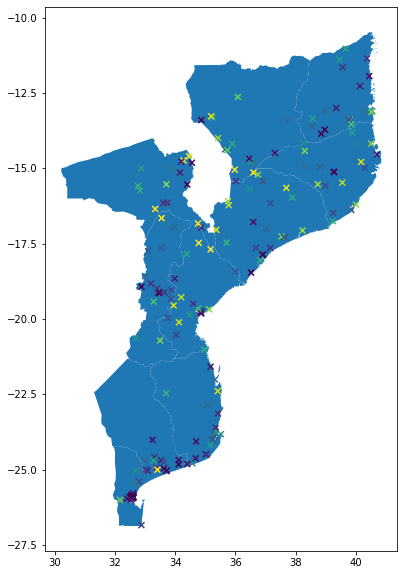

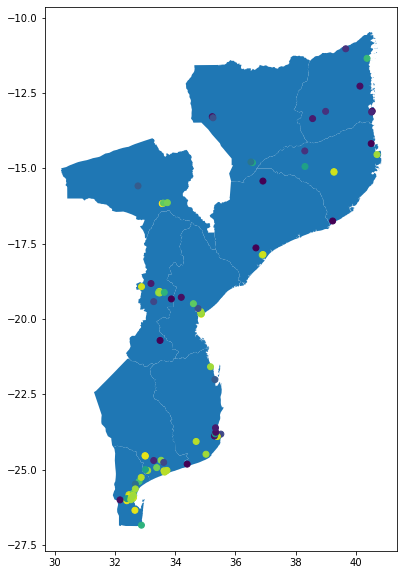

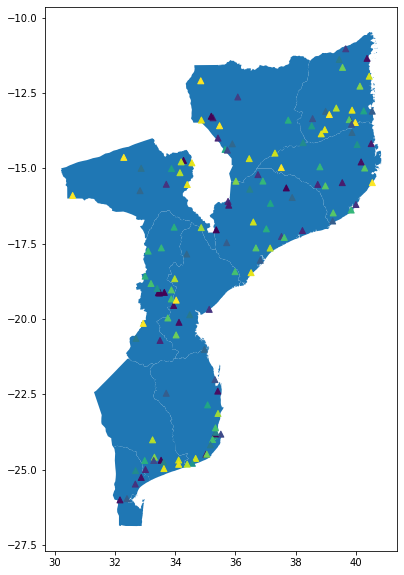

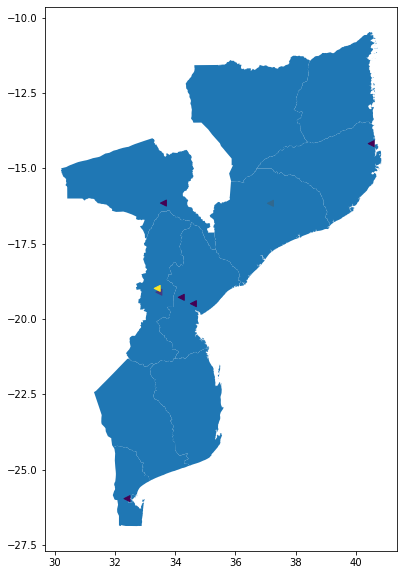

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt

mozambique_file = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MOZA\\moz_admbnda_adm1_ine_20190607.shp'
mozambique = gpd.read_file(mozambique_file)

fig, ax = plt.subplots(figsize=(10,10))
mozambique.plot(ax=ax)
ea.plot(ax=ax, column='elementary_access', marker='x')

fig, bx = plt.subplots(figsize=(10,10))
mozambique.plot(ax=bx)
ia.plot(ax=bx, column='improved_access', marker='o')

fig, cx = plt.subplots(figsize=(10,10))
mozambique.plot(ax=cx)
la.plot(ax=cx, column='limited_access', marker='^')

fig, dx = plt.subplots(figsize=(10,10))
mozambique.plot(ax=dx)
oa.plot(ax=dx, column='other', marker='<')

<AxesSubplot:>

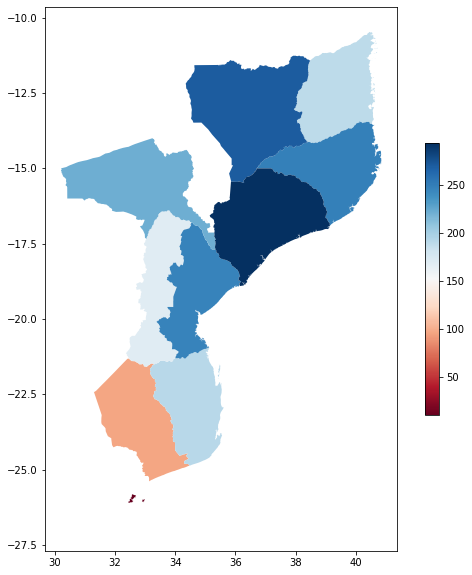

In [70]:
fig, aax = plt.subplots(figsize=(10,10))
eaMoza.plot(ax=aax, cmap='RdBu', column='elementary_access', legend=True, legend_kwds={'shrink':0.5})

<AxesSubplot:>

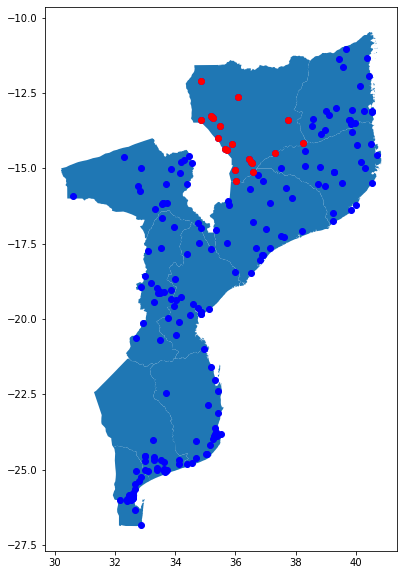

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt

mozam = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MOZA\\moz_admbnda_adm1_ine_20190607.shp'
df = gpd.read_file(mozam)

fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax = ax)

shp_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MZGE7AFL\\MZGE7AFL.shp'

df2 = gpd.read_file(shp_path)
df2 = df2[df2.SOURCE == 'GPS']
df3 = df2[df2.DHSREGNA == 'Niassa']

df2.plot(ax = ax, color='blue')
df3.plot(ax = ax, color='red')

In [8]:
df3

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,MZ201800000101,MZ,2018.0,101.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,U,-13.285618,35.231138,1350.0,1340.0,WGS84,POINT (35.23114 -13.28562)
1,MZ201800000102,MZ,2018.0,102.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,U,-13.322655,35.255217,1364.0,1356.0,WGS84,POINT (35.25522 -13.32266)
2,MZ201800000103,MZ,2018.0,103.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,U,-13.271620,35.196597,1257.0,1255.0,WGS84,POINT (35.19660 -13.27162)
3,MZ201800000104,MZ,2018.0,104.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,U,-14.811983,36.563687,580.0,574.0,WGS84,POINT (36.56369 -14.81198)
4,MZ201800000105,MZ,2018.0,105.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,U,-14.788214,36.514077,568.0,575.0,WGS84,POINT (36.51408 -14.78821)
5,MZ201800000106,MZ,2018.0,106.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,U,-14.370951,35.655547,163.0,744.0,WGS84,POINT (35.65555 -14.37095)
6,MZ201800000107,MZ,2018.0,107.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,R,-15.136528,36.596724,621.0,618.0,WGS84,POINT (36.59672 -15.13653)
7,MZ201800000108,MZ,2018.0,108.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,R,-14.676967,36.456598,624.0,624.0,WGS84,POINT (36.45660 -14.67697)
8,MZ201800000109,MZ,2018.0,109.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,R,-12.094848,34.849172,487.0,481.0,WGS84,POINT (34.84917 -12.09485)
9,MZ201800000110,MZ,2018.0,110.0,MZ,NULL,NULL,NULL,NULL,1.0,...,1.0,Niassa,GPS,R,-13.585551,35.472743,919.0,907.0,WGS84,POINT (35.47274 -13.58555)


In [3]:
# Import the necessary modules
shp_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MZGE7AFL\\MZGE7AFL.shp'

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

%matplotlib inline

sf = shp.Reader(shp_path)

len(sf.shapes())

224

In [4]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [5]:
df = read_shapefile(sf)
df.shape

(224, 21)

In [34]:
regioncoords = df.groupby('DHSREGNA')['coords'].apply(list).to_dict()

"""for city , coords in regioncoords.items():
    poly = []
    for coord in coords:
        for a,b in coord:
            poly.append(a)
            poly.append(b)"""
x_lon = []
y_lat = []          
for city , coords in regioncoords.items():
    for coord in coords:
        for a,b in coord:
            x_lon.append(a)
            y_lat.append(b)
        

<AxesSubplot:>

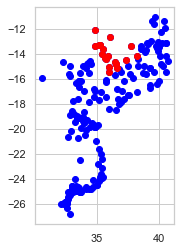

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt



shp_path = 'C:\\Users\\Felix\\github\\Projekte\\DHS_Api\\MZGE7AFL\\MZGE7AFL.shp'

df = gpd.read_file(shp_path)
df = df[df.SOURCE == 'GPS']
SA1 = df[df.DHSREGNA == 'Niassa']

fig, ax = plt.subplots()
df.plot(ax = ax, color='blue')
SA1.plot(ax = ax, color='red')

In [42]:
import matplotlib.pyplot as plt
fix, ax = plt.subplot(figsize=(10,10))

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

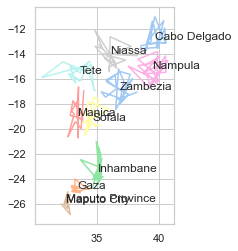

In [25]:
comuna = 'Niassa'
#df1 = df[df.ADM1NAME == comuna]
#df1.index.get_value(1, 'coords')

regioncoords = df.groupby('DHSREGNA')['coords'].apply(list).to_dict()

#groups = df.groupby('DHSREGNA').groups


plt.figure()
ax = plt.axes()
ax.set_aspect('equal')
for city , coords in regioncoords.items():
    x_lon = []
    y_lat = []

    for coord in coords:
        for a,b in coord:
            x_lon.append(a)
            y_lat.append(b)
    plt.plot(x_lon,y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, city, fontsize=12)
        


In [ ]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

comuna = 'Nampula'
com_id = df[df.ADM1NAME == comuna].index.get_values()[0]
# ? com_id = df[df.ADM1NAME == comuna].index.to_numpy()

#plot_shape(com_id, comuna)

#print(com_id)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon



for a,b in testxx.items():
    if a == 'Nampula':
        for x in b:
            for coords in x:
                #print(coords)
                a, b = coords
                #print(a)
                
                #pts = np.array([[2,2], [6,5], [3,np.sqrt(5**2 - 2**2)]])
                pts = np.array([coords])
                p = Polygon(pts, closed=False)
                ax = plt.gca()
                ax.add_patch(p)


                
ax.set_xlim(25,45)
ax.set_ylim(-30,-5)

plt.show()

In [ ]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
plot_map(sf)